# Lecture 9 可視化
・線プロット\
・棒グラフ\
・ヒストグラム\
・散布図\
・3Dプロット\
・複数プロット\
・プロットファイル保存 

#Terminalにて\
        > ]\
(@v1.5) pkg> add PyPlot\
(@v1.5) pkg> add FixedPointNumbers\
\

#Jupyter notebookにて\
using Pkg\
Pkg.add("PyPlot")\
Pkg.add("FixedPointNumbers")

In [2]:
using PyPlot

In [3]:
using FixedPointNumbers, ColorTypes

In [4]:
#RGB(1,1,1)

In [5]:
#2019年1月から12月までの東京における平均気温(℃)と降水量（mm）
loc = "/Users/satoshi/udemy_study/julia/data/"
filename = "temp_2019_tokyo.csv"

#CSVファイルを読み込んで、データを配列に格納する。
f = open(loc * filename)
i = 0

#格納する配列
tt = zeros(Int64,0)   #月
xx = zeros(Float64,0) #平均気温(℃)
yy = zeros(Float64,0) #降水量(mm)

for line in eachline(f)
    i += 1
    i == 1 && continue #1行目をとばす

    s = split(line, ",")   # ","区切りであることを示す
    t = parse(Int64, s[1]) #文字列から数値に型変換
    push!(tt,t)            #配列にpush!
    x = parse(Float64, s[2])
    push!(xx,x)
    y = parse(Float64, s[3])
    push!(yy,y)    
end

In [6]:
println(xx)

[5.6, 7.2, 10.6, 13.6, 20.0, 21.8, 24.1, 28.4, 25.1, 19.4, 13.1, 8.5]


In [7]:
println(yy)

[16.0, 42.0, 117.5, 90.5, 120.5, 225.0, 193.0, 110.0, 197.0, 529.5, 156.5, 76.5]


In [8]:
println(tt)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [9]:
PyPlot.version

v"3.3.1"

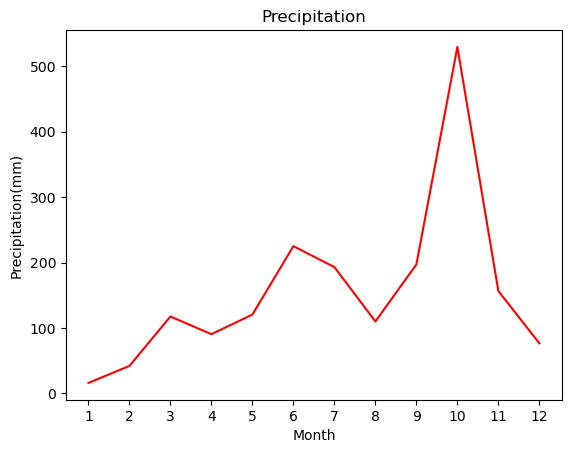

In [12]:
ax = PyPlot.axes()

plot(tt, yy, color = :red);
title("Precipitation")
xlabel("Month")
ylabel("Precipitation(mm)")

Mx = matplotlib.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(Mx)

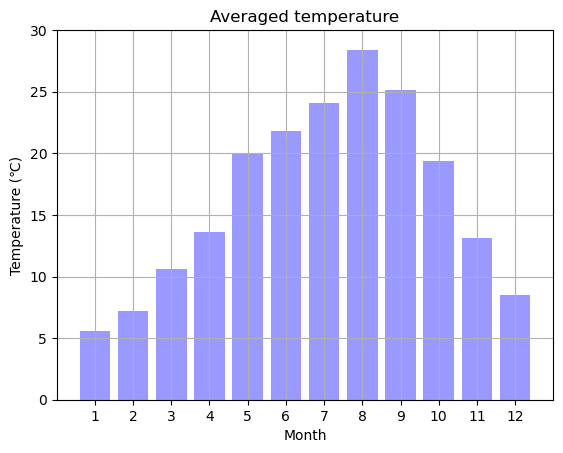

(0.0, 30.0)

In [10]:
#棒グラフ
ax = PyPlot.axes()

#b = bar(tt,xx,color="#0f87bf",align="center",alpha=0.4)
b = bar(tt,xx,color=:blue,align="center",alpha=0.4)

PyPlot.title("Averaged temperature")
grid("on")
xlabel("Month")
ylabel("Temperature (℃)")

Mx = matplotlib.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(Mx)

ylim(0,30)

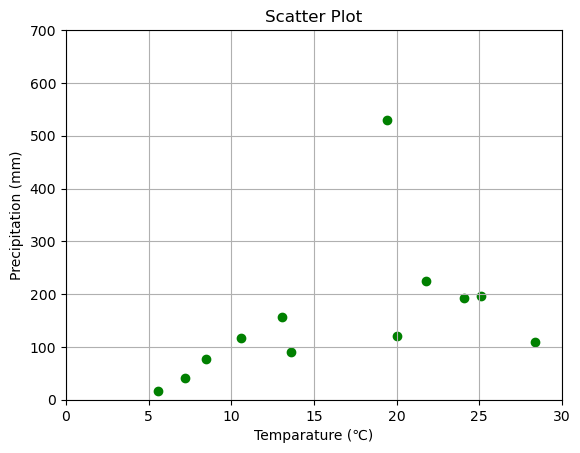

(0.0, 700.0)

In [11]:
#散布図
#fig = figure("pyplot_scatterplot",figsize=(5,5))
#ax = PyPlot.axes()

scatter(xx,yy,alpha=1,color=:green,)
#scatter(xx,yy,s=areas,alpha=0.5)

PyPlot.title("Scatter Plot")
xlabel("Temparature (℃)")
ylabel("Precipitation (mm)")
grid("on")

xlim(0,30)
ylim(0,700)

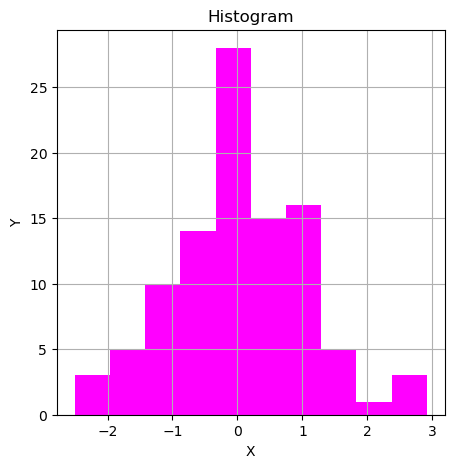

PyObject Text(0.5, 1.0, 'Histogram')

In [12]:
#ヒストグラム
x = randn(100) # Values
nbins = 10; # Number of bins

fig = figure("Histogram",figsize=(5,5)) 
ax = PyPlot.axes() 
h = plt.hist(x,nbins,color=:magenta,) 

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")

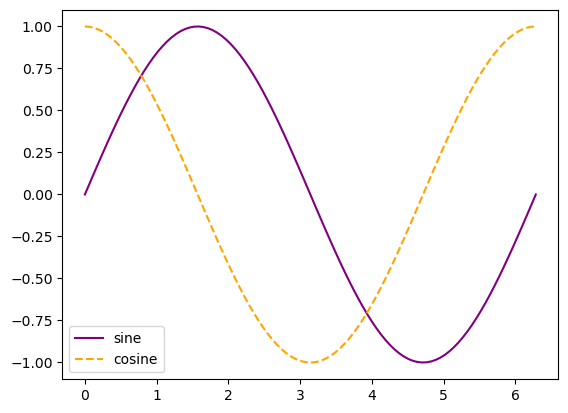

PyObject <matplotlib.legend.Legend object at 0x7ff4ede44eb0>

In [13]:
#凡例
x = range(0,2pi,length=100) #range:等差数列を作る

plot(x, sin.(x), "-", label = "sine", color = :purple)
plot(x, cos.(x), "--", label = "cosine" ,color=:orange)
legend()

mac : ターミナルからopenで開く

In [14]:
#3Dプロット
n = 30
x = range(-3, 3,length = n) #数列
y = range(-3, 3,length = n)

xx = collect(x) #配列に変換する
yy = collect(y)

z = zeros(n,n)

for i in 1:n
    for j in 1:n
        z[i,j] = xx[i]^2 + yy[j]^2   # z = x^2 + y^2
    end
end

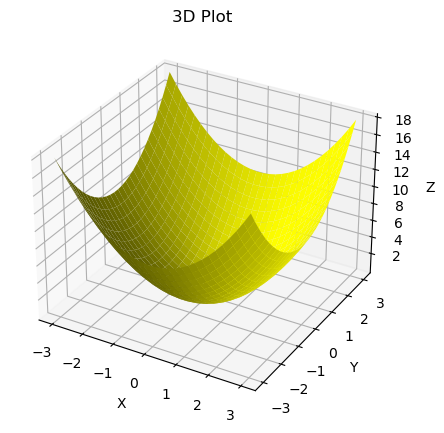

PyObject Text(0.5, 1.0, '3D Plot')

In [15]:
#3Dプロット
fig = figure("pyplot_surfaceplot",figsize=(5,5))
ax = PyPlot.axes()
plot_surface(xx, yy, z, color = :yellow)
xlabel("X")
ylabel("Y")
zlabel("Z")
PyPlot.title("3D Plot")

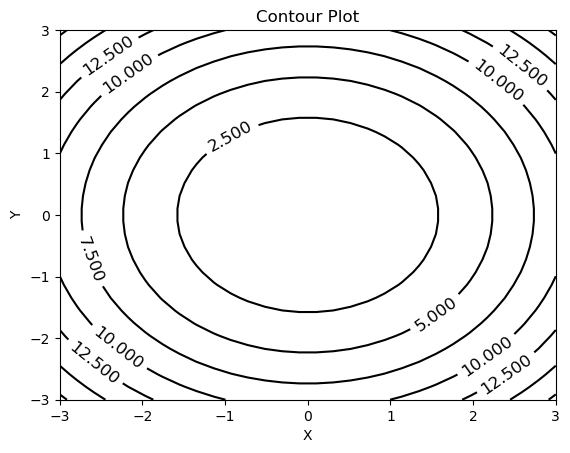

PyObject Text(0.5, 1.0, 'Contour Plot')

In [32]:
ax = PyPlot.axes()
cp = contour(xx, yy, z, colors=:black, linewidth=1.0) #color=にすると色が変わる
ax.clabel(cp, inline=1, fontsize=12)
xlabel("X")
ylabel("Y")
PyPlot.title("Contour Plot")
#tight_layout()

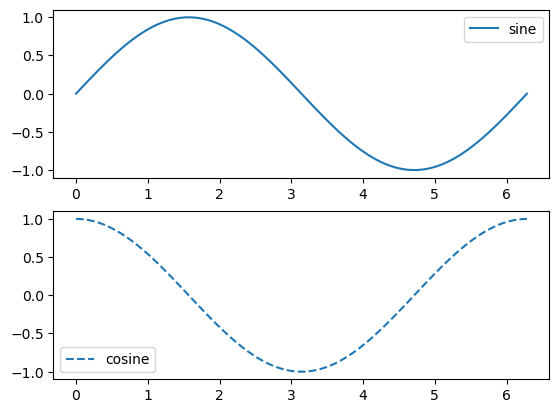

In [16]:
#複数プロット & プロットの保存
x = range(0, 2pi, length=100)

subplot(2,1,1)
plot(x, sin.(x), "-", label = "sine")
legend()

subplot(2,1,2)
plot(x, cos.(x), "--", label = "cosine")

legend()

savefig("/Users/satoshi/udemy_study/julia/image1.png")